In [30]:
import pandas as pd
import numpy as np

In [31]:
test = pd.read_csv(r"shopping_trends.csv")

In [32]:
test.describe()
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,FirstName,LastName,ADEmail,Phone number
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,Uriah,Bridges,uriah.bridges@gmail.com,+1677-636-9520
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,Paula,Small,paula.small@gmail.com,+1818-686-1476
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Edward,Buck,edward.buck@gmail.com,+1675-782-9048
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,Michael,Riordan,michael.riordan@gmail.com,+1555-829-8034
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,Jasmine,Onque,jasmine.onque@gmail.com,+1670-933-3054


In [33]:
test.shape
test.head()
df = test.drop(["Subscription Status","Discount Applied","Promo Code Used","Shipping Type"], axis='columns')
test = test.dropna()

In [34]:
test.shape
test.head()
df = test.drop(["Subscription Status","Discount Applied","Promo Code Used","Shipping Type"], axis='columns')
test = test.dropna()

In [35]:
import pandas as pd

df['First Name'] = 'User_fname' + (df.index + 1).astype(str)
df['Last Name'] = 'User_lname' + (df.index + 1).astype(str)
df = test.drop(["FirstName","LastName"], axis='columns')

# df = df.drop(["LastName"],axis = 1)  # Replace names with generic labels
# df.drop(['Email', 'Phone'], axis=1, inplace=True)  # Remove email and phone numbers

print("Anonymized Data:")
df.head()


Anonymized Data:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,ADEmail,Phone number
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,uriah.bridges@gmail.com,+1677-636-9520
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,paula.small@gmail.com,+1818-686-1476
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,edward.buck@gmail.com,+1675-782-9048
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,michael.riordan@gmail.com,+1555-829-8034
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,jasmine.onque@gmail.com,+1670-933-3054


In [36]:
import pandas as pd
import hashlib

def hash_data(data):
    """
    Hash the input data using SHA-256 algorithm.

    Parameters:
        data (str): Input data to be hashed.

    Returns:
        str: Hashed value of the input data.
    """
    # Encode the input data as bytes
    encoded_data = data.encode('utf-8')

    # Compute the SHA-256 hash
    hashed_data = hashlib.sha256(encoded_data).hexdigest()

    return hashed_data

# Hash data in the 'Email' column
df['HashedEmail'] = df['ADEmail'].apply(hash_data)
df['HashedPhone number'] = df['Phone number'].apply(hash_data)
df = test.drop(["ADEmail","Phone number"], axis='columns')


print("DataFrame with Hashed Email:")
print(df)


DataFrame with Hashed Email:
      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2

In [37]:
df.info()
df['Gender'] = df['Gender'].map({"Male" : 1, "Female" : 0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [38]:
df['Item Purchased'] = df['Item Purchased'].map({'Blouse' : 0, 'Sweater' : 1, 'Jeans' : 2, 'Sandals' : 3 , 'Sneakers' : 4, 'Shirt' : 5,
       'Shorts' : 6, 'Coat' : 7, 'Handbag' : 8, 'Shoes' : 9, 'Dress' : 10, 'Skirt' : 11 ,
       'Sunglasses' : 12, 'Pants' :13 , 'Jacket' : 14, 'Hoodie' :15 , 'Jewelry' : 16, 'T-shirt' :17 ,
       'Scarf' : 18, 'Hat' : 19, 'Socks' :20 , 'Backpack' : 21, 'Belt' : 22, 'Boots' : 23, 'Gloves' :24 })


In [39]:
print(test['Category'].unique())
df['Category'] = df['Category'].map({'Clothing':0, 'Footwear':1, 'Outerwear':2, 'Accessories':3})

['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In [40]:
print(test['Location'].unique())
df['Location'] = df['Location'].map({'Kentucky':0, 'Maine':1, 'Massachusetts':2, 'Rhode Island':3, 'Oregon':4, 'Wyoming':5,
 'Montana':6, 'Louisiana':7, 'West Virginia':8, 'Missouri':9, 'Arkansas':10, 'Hawaii':11,
 'Delaware':12, 'New Hampshire' :13,'New York':14, 'Alabama':15, 'Mississippi':16,
 'North Carolina' :17,'California':18, 'Oklahoma' :19,'Florida':20, 'Texas':21, 'Nevada':22,
 'Kansas':23, 'Colorado' :24,'North Dakota':25, 'Illinois' :26,'Indiana' :27,'Arizona':28,
 'Alaska':29, 'Tennessee':30, 'Ohio':31, 'New Jersey' :32,'Maryland':33, 'Vermont':34,
 'New Mexico': 35,'South Carolina':36, 'Idaho':37, 'Pennsylvania' :38,'Connecticut':39, 'Utah':40,
 'Virginia':41, 'Georgia':42, 'Nebraska':43, 'Iowa' :44,'South Dakota':45, 'Minnesota':46,
 'Washington':47, 'Wisconsin' :48,'Michigan':49})

['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']


In [41]:
print(test['Frequency of Purchases'].unique())
df['Frequency of Purchases'] = df['Frequency of Purchases'].map({'Fortnightly':0, 'Weekly':1, 'Annually':2, 'Quarterly':3, 'Bi-Weekly':4, 'Monthly':5,
 'Every 3 Months':6})

['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [42]:
print(test['Color'].unique())
df['Color'] = df['Color'].map({'Gray':0, 'Maroon':1, 'Turquoise':2, 'White':3, 'Charcoal':4, 'Silver':5, 'Pink':6, 'Purple':7,
 'Olive':8, 'Gold':9, 'Violet':10, 'Teal':11, 'Lavender':12, 'Black':13, 'Green':14, 'Peach':15, 'Red':16,
 'Cyan':17, 'Brown':18, 'Beige':19, 'Orange':20, 'Indigo':21, 'Yellow':22, 'Magenta':23, 'Blue':24})

['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal' 'Silver' 'Pink' 'Purple'
 'Olive' 'Gold' 'Violet' 'Teal' 'Lavender' 'Black' 'Green' 'Peach' 'Red'
 'Cyan' 'Brown' 'Beige' 'Orange' 'Indigo' 'Yellow' 'Magenta' 'Blue']


In [43]:
print(test['Season'].unique())
df['Season'] = df['Season'].map({'Winter':0, 'Spring':1, 'Summer':2, 'Fall':3})

['Winter' 'Spring' 'Summer' 'Fall']


In [44]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,FirstName,LastName
0,1,55,1,0,0,53,0,L,0,0,...,Yes,Credit Card,Express,Yes,Yes,14,Venmo,0,Uriah,Bridges
1,2,19,1,1,0,64,1,L,1,0,...,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,0,Paula,Small
2,3,50,1,2,0,73,2,S,1,1,...,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,1,Edward,Buck
3,4,21,1,3,1,90,3,M,1,1,...,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,1,Michael,Riordan
4,5,45,1,0,0,49,4,M,2,1,...,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,2,Jasmine,Onque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,15,0,28,41,L,2,2,...,No,Cash,2-Day Shipping,No,No,32,Venmo,1,Roma,Lafollette
3896,3897,52,0,21,3,49,44,L,3,1,...,No,PayPal,Store Pickup,No,No,41,Bank Transfer,4,Felisa,Cail
3897,3898,46,0,22,3,33,32,L,14,1,...,No,Credit Card,Standard,No,No,24,Venmo,3,Demetria,Abbey
3898,3899,44,0,9,1,77,46,S,18,2,...,No,PayPal,Express,No,No,24,Venmo,1,Jeromy,Danz


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   int64  
 3   Item Purchased            3900 non-null   int64  
 4   Category                  3900 non-null   int64  
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   int64  
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   int64  
 9   Season                    3900 non-null   int64  
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [46]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,FirstName,LastName
0,1,55,1,0,0,53,0,L,0,0,...,Yes,Credit Card,Express,Yes,Yes,14,Venmo,0,Uriah,Bridges
1,2,19,1,1,0,64,1,L,1,0,...,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,0,Paula,Small
2,3,50,1,2,0,73,2,S,1,1,...,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,1,Edward,Buck
3,4,21,1,3,1,90,3,M,1,1,...,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,1,Michael,Riordan
4,5,45,1,0,0,49,4,M,2,1,...,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,2,Jasmine,Onque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,15,0,28,41,L,2,2,...,No,Cash,2-Day Shipping,No,No,32,Venmo,1,Roma,Lafollette
3896,3897,52,0,21,3,49,44,L,3,1,...,No,PayPal,Store Pickup,No,No,41,Bank Transfer,4,Felisa,Cail
3897,3898,46,0,22,3,33,32,L,14,1,...,No,Credit Card,Standard,No,No,24,Venmo,3,Demetria,Abbey
3898,3899,44,0,9,1,77,46,S,18,2,...,No,PayPal,Express,No,No,24,Venmo,1,Jeromy,Danz


In [47]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,FirstName,LastName
0,1,55,1,0,0,53,0,L,0,0,...,Yes,Credit Card,Express,Yes,Yes,14,Venmo,0,Uriah,Bridges
1,2,19,1,1,0,64,1,L,1,0,...,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,0,Paula,Small
2,3,50,1,2,0,73,2,S,1,1,...,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,1,Edward,Buck
3,4,21,1,3,1,90,3,M,1,1,...,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,1,Michael,Riordan
4,5,45,1,0,0,49,4,M,2,1,...,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,2,Jasmine,Onque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,15,0,28,41,L,2,2,...,No,Cash,2-Day Shipping,No,No,32,Venmo,1,Roma,Lafollette
3896,3897,52,0,21,3,49,44,L,3,1,...,No,PayPal,Store Pickup,No,No,41,Bank Transfer,4,Felisa,Cail
3897,3898,46,0,22,3,33,32,L,14,1,...,No,Credit Card,Standard,No,No,24,Venmo,3,Demetria,Abbey
3898,3899,44,0,9,1,77,46,S,18,2,...,No,PayPal,Express,No,No,24,Venmo,1,Jeromy,Danz


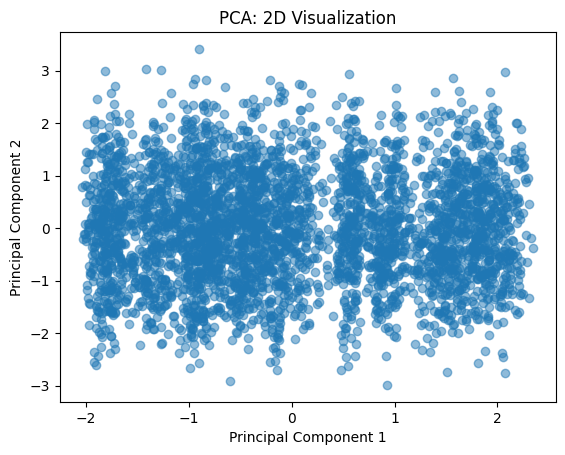

In [49]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
# Replace 'your_dataset.csv' with the path to your dataset
#df = pd.read_csv('your_dataset.csv')

# Select the subset of attributes for dimensionality reduction
selected_attributes = ['Age', 'Gender', 'Item Purchased', 'Category','Location','Season','Previous Purchases','Frequency of Purchases']
selected_data = df[selected_attributes]

# Standardize the selected attributes
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_data = pca.fit_transform(scaled_data)

# Create a DataFrame for the reduced data
reduced_df = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])

# Visualize the reduced data in a scatter plot
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Visualization')
plt.show()
